# Assignment 1

## Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_dataset(filename: str):
    data = np.loadtxt(filename)
    print(f"Loaded {len(data)} samples from {filename}")
    return data

In [4]:
Xtrain = load_dataset("Xtrain.csv")
Xtest = load_dataset("Xtest.csv")
Ytrain = load_dataset("Ytrain.csv")

Loaded 3000 samples from Xtrain.csv
Loaded 3000 samples from Xtest.csv
Loaded 3000 samples from Ytrain.csv


Text(0, 0.5, 'Number of samples')

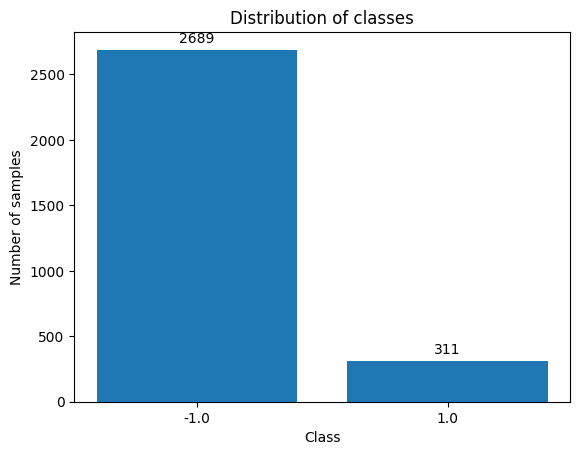

In [5]:
training_classes_counts = np.unique(Ytrain, return_counts=True)
fig, ax = plt.subplots()
bars = ax.bar(
    list(map(str, training_classes_counts[0])), training_classes_counts[1]
)
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f"{height}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )
plt.title("Distribution of classes")
plt.xlabel("Class")
plt.ylabel("Number of samples")

i.

a. There are 3000 examples in the training set and 3000 in the test set.

b. The training data has 2689 negative examples and 311 positive examples. There are almost 9 times as many negative examples as positive ones. This unbalanced dataset means that our classifier may not be as good at identifying features of the positive class. This can be rectified in training by oversampling the positive examples so that our classifier doesn't get biased to predicting the negative majority class (if this distribution is not representative of a real world distribution).

In [6]:
def show_random_samples(dataset, title, labels=None):
    random_samples_count = 10
    random_samples_indices = np.random.choice(
        len(Xtrain), size=random_samples_count, replace=False
    )
    random_samples = dataset[random_samples_indices]
    if labels is not None:
        random_samples_labels = labels[random_samples_indices]
    random_samples = np.reshape(random_samples, (random_samples_count, 28, 28))
    fig, axs = plt.subplots(2, 5)
    fig.set_figwidth(10)
    for i, sample in enumerate(random_samples):
        axs.flat[i].matshow(sample)
        if labels is not None:
            axs.flat[i].set_title(str(random_samples_labels[i]))
    fig.suptitle(title, size=14)
    fig.tight_layout()

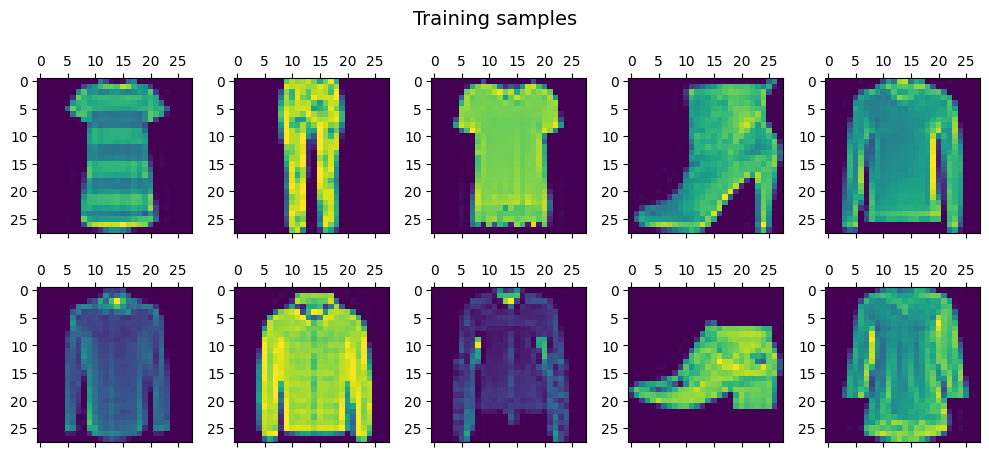

In [7]:
show_random_samples(Xtrain, "Training samples")

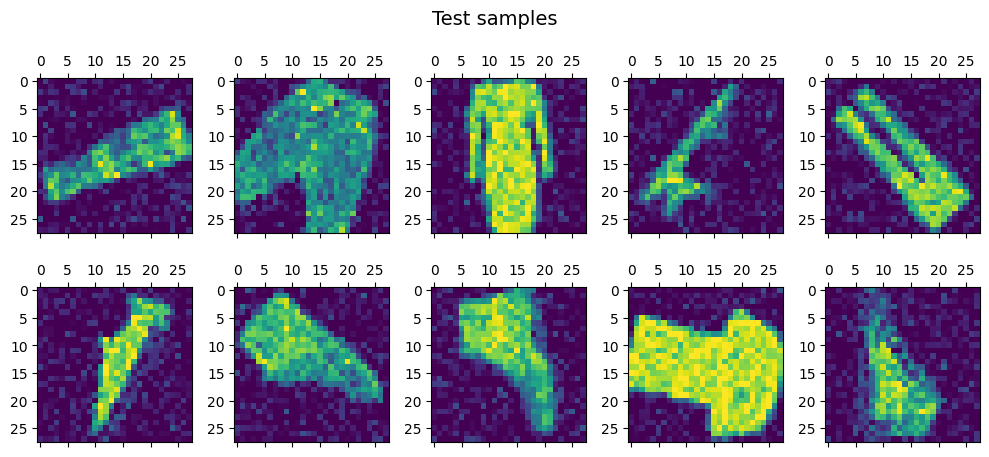

In [8]:
show_random_samples(Xtest, "Test samples")

ii.

a.

The samples look like items of clothing. They are all the right orientation, high contrast and well positioned.

b.

The test set samples are noisy and have random orientations. These will both pose problems for the classifier. The noise means the features are less defined, and the different orientations present different features entirely.

iii.

The F1 score combines precision and recall into a single metric and is useful when there is an uneven class distribution. It gives equal weight to both precision and recall and is particularly effective for binary classification tasks with imbalanced class distributions - as is our case here. Notably the AUC-ROC would be a poor choice since our number of negative classes is so high.

iv.

Since there are only two labels, the classifier would choose them with equal 0.5 probability. so given any sample $x$ with a label $y$ and predicted label $\hat y$, it holds that $\mathbb{P}(\hat y = y) = \mathbb{P}(y = 1)\mathbb{P}(\hat y = 1) + \mathbb{P}(y = -1) \mathbb{P}(\hat y = -1) = 0.5(\mathbb{P}(y = 1)+\mathbb{P}(y = -1)) = 0.5$. So, given any distribution of classes, a random classifier would have an accuracy of $0.5$.

v.

Suppose our classifier choses a positive outcome with probability $p$. Then our FPR will be $p$ and our TPR will also be $p$ so our ROC curve will be a straight line from (0,0) to (1,1) giving an AUC-ROC of 0.5.

Suppose the proportion of positive samples is $k_P$. The precision for such a classifier would be $\frac{p k_P}{p}=k_P$ so the precision is constant and gives a horizontal PR curve at $k_P$. This gives an AUC-PR of $k_P$

## Question 2

i.

Accuracy is the ratio of correctly classified samples.

Balanced accuracy is the mean of the true positive rate and the true negative rate (this accounts or an imbalanced training set).

AUC-ROC is the Area Under the Receiver Operating Characteristic Curve. The ROCC is the plot of True positive rate vs False positive rate.

AUC-PR is the Area Under the Precision-Recall Curve. The PR curve is the plot of Precision vs recall (or true positive rate)

F1 score is the harmonic mean of precision and recall. Precision is the proportion of true positive predictions to the total positive predictions.

MCC is a measure of correlation of the predicted classes and true classes.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    average_precision_score,
    f1_score,
    matthews_corrcoef,
    roc_curve,
    precision_recall_curve,
)
import pandas as pd
from timeit import default_timer as timer

splits = 5
n_neighbors = 5


def plot_roc_pr_curves(
    Xtrain, Ytrain, Xval, Yval, classifier_cls, classifier_kwargs, title
):
    classifier = classifier_cls(**classifier_kwargs)
    classifier.fit(Xtrain, Ytrain)

    z = classifier.predict_proba(Xval)[:, 1]
    fpr, tpr, thresholds = roc_curve(Yval, z)
    precision, recall, thresholds = precision_recall_curve(Yval, z)

    fig, ax = plt.subplots(2, 2)
    ax[0, 1].plot(fpr, tpr, "o-")
    ax[0, 1].set_title("ROC curve - validation set")
    ax[0, 1].set_xlabel("False positive rate")
    ax[0, 1].set_ylabel("True positive rate")
    ax[0, 1].grid(True)
    ax[1, 1].plot(recall, precision, "o-")
    ax[1, 1].set_title("Precision-Recall curve - validation set")
    ax[1, 1].set_xlabel("Recall")
    ax[1, 1].set_ylabel("Precision")
    ax[1, 1].grid(True)

    z = classifier.predict_proba(Xtrain)[:, 1]
    fpr, tpr, thresholds = roc_curve(Ytrain, z)
    precision, recall, thresholds = precision_recall_curve(Ytrain, z)
    ax[0, 0].plot(fpr, tpr, "o-")
    ax[0, 0].set_title("ROC curve - training set")
    ax[0, 0].set_xlabel("False positive rate")
    ax[0, 0].set_ylabel("True positive rate")
    ax[0, 0].grid(True)
    ax[1, 0].plot(recall, precision, "o-")
    ax[1, 0].set_title("Precision-Recall curve - training set")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].grid(True)
    fig.suptitle(title, size=14)
    fig.tight_layout()
    plt.show()


def perform_cross_validation(
    Xtrain,
    Ytrain,
    classifier_cls,
    classifier_kwargs,
    title,
    splits=splits,
    plot_graph=True,
    silent=False,
):
    stats_df = pd.DataFrame(columns=["metric", "mean", "std"])
    stats_df["metric"] = [
        "Accuracy",
        "Balanced accuracy",
        "AUC ROC",
        "AUC PR",
        "F1",
        "MCC",
        "Time Taken",
    ]

    metrics = []

    skf = StratifiedKFold(n_splits=splits)
    folds = list(skf.split(Xtrain, Ytrain))
    for i, (train_index, val_index) in enumerate(folds):
        Xtrain_split = Xtrain[train_index]
        Xval_split = Xtrain[val_index]
        Ytrain_split = Ytrain[train_index]
        Yval_split = Ytrain[val_index]
        classifier = classifier_cls(**classifier_kwargs)

        time_start = timer()
        classifier.fit(Xtrain_split, Ytrain_split)
        time_taken = timer() - time_start

        z = classifier.predict_proba(Xval_split)[:, 1]
        Yval_pred = classifier.predict(Xval_split)

        accuracy = accuracy_score(Yval_split, Yval_pred)
        bal_accuracy = balanced_accuracy_score(Yval_split, Yval_pred)
        auc_roc = roc_auc_score(Yval_split, z)
        auc_pr = average_precision_score(Yval_split, z)
        F1 = f1_score(Yval_split, Yval_pred)
        matthews_cc = matthews_corrcoef(Yval_split, Yval_pred)

        metrics.append(
            [
                accuracy,
                bal_accuracy,
                auc_roc,
                auc_pr,
                F1,
                matthews_cc,
                time_taken,
            ]
        )

    metrics = np.array(metrics)
    metrics_mean = np.mean(metrics, axis=0)
    metrics_std = np.std(metrics, axis=0)
    stats_df["mean"] = metrics_mean
    stats_df["std"] = metrics_std

    if not silent:
        print(f"{title} - Validation set statistics")
        print(stats_df)

        if plot_graph:
            train_index, val_index = folds[0]

            X_fold_train = Xtrain[train_index]
            Y_fold_train = Ytrain[train_index]

            plot_roc_pr_curves(
                X_fold_train,
                Y_fold_train,
                Xtrain[val_index],
                Ytrain[val_index],
                classifier_cls,
                classifier_kwargs,
                title,
            )

    return stats_df

/tmp/ipykernel_180649/2524808575.py:15: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


KNN cross-validation - Validation set statistics
              metric      mean       std
0           Accuracy  0.909667  0.004643
1  Balanced accuracy  0.705068  0.010686
2            AUC ROC  0.853818  0.020051
3             AUC PR  0.490948  0.038623
4                 F1  0.506219  0.011249
5                MCC  0.463826  0.012757
6         Time Taken  0.001955  0.000263


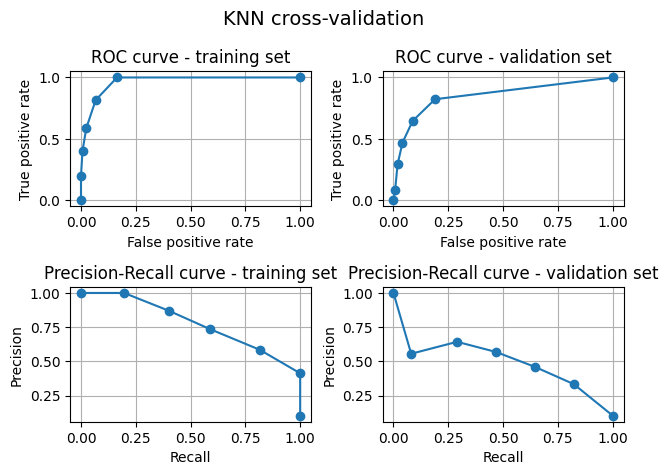

In [10]:
stats_df = perform_cross_validation(
    Xtrain,
    Ytrain,
    KNeighborsClassifier,
    {"n_neighbors": n_neighbors},
    "KNN cross-validation",
)

ii.

The ROC curve is most informative at a low false positive rate. Having a high true positive rate here means we have a skilled classifier. However having a low proportion of positive classes makes the ROC curve less useful.

iii.

KNN cross-validation with MinMaxScaler - Validation set statistics
              metric      mean       std
0           Accuracy  0.910333  0.005312
1  Balanced accuracy  0.708293  0.008480
2            AUC ROC  0.854270  0.019951
3             AUC PR  0.492061  0.041535
4                 F1  0.511955  0.012758
5                MCC  0.469372  0.017456
6         Time Taken  0.002110  0.000202


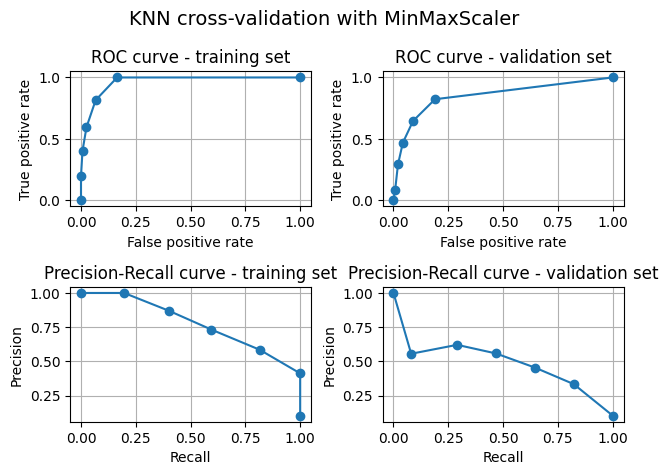

KNN cross-validation with StandardScaler - Validation set statistics
              metric      mean       std
0           Accuracy  0.911333  0.010562
1  Balanced accuracy  0.718890  0.020639
2            AUC ROC  0.865129  0.020786
3             AUC PR  0.513670  0.059425
4                 F1  0.527564  0.042577
5                MCC  0.483935  0.050392
6         Time Taken  0.001880  0.000214


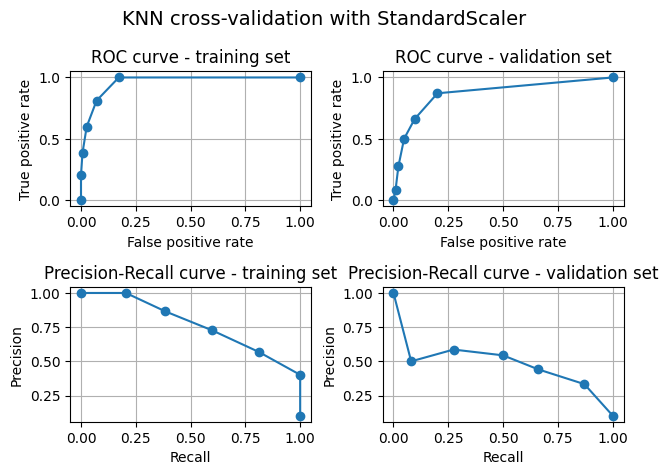

KNN cross-validation with random rotations - Validation set statistics
              metric      mean       std
0           Accuracy  0.893333  0.010488
1  Balanced accuracy  0.666067  0.028706
2            AUC ROC  0.820576  0.021537
3             AUC PR  0.369213  0.057467
4                 F1  0.423461  0.051942
5                MCC  0.370765  0.055584
6         Time Taken  0.001781  0.000183


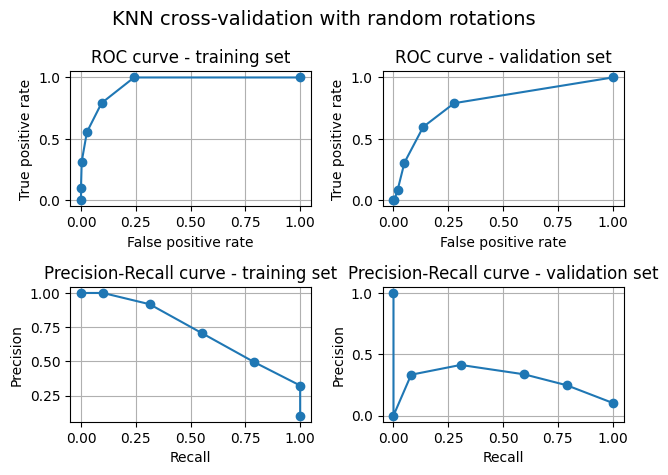

Preprocessing technique comparison
              metric   initial   min_max  standard  random_rotations
0           Accuracy  0.909667  0.910333  0.911333          0.893333
1  Balanced accuracy  0.705068  0.708293  0.718890          0.666067
2            AUC ROC  0.853818  0.854270  0.865129          0.820576
3             AUC PR  0.490948  0.492061  0.513670          0.369213
4                 F1  0.506219  0.511955  0.527564          0.423461
5                MCC  0.463826  0.469372  0.483935          0.370765
6         Time Taken  0.001955  0.002110  0.001880          0.001781
Ratios
              metric   min_max  standard  random_rotations
0           Accuracy  1.000733  1.001832          0.982045
1  Balanced accuracy  1.004575  1.019604          0.944685
2            AUC ROC  1.000529  1.013248          0.961067
3             AUC PR  1.002267  1.046282          0.752041
4                 F1  1.011331  1.042165          0.836517
5                MCC  1.011958  1.043355          0.

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
Xtrain_preprocessed = min_max_scaler.fit_transform(Xtrain)

min_max_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    KNeighborsClassifier,
    {"n_neighbors": n_neighbors},
    "KNN cross-validation with MinMaxScaler",
)

standard_scaler = StandardScaler()
Xtrain_preprocessed = standard_scaler.fit_transform(Xtrain)

standard_scale_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    KNeighborsClassifier,
    {"n_neighbors": n_neighbors},
    "KNN cross-validation with StandardScaler",
)


def random_rotations(dataset):
    dataset = np.reshape(dataset, (dataset.shape[0], 28, 28))
    dataset = np.array(
        [np.rot90(sample, np.random.randint(0, 4)) for sample in dataset]
    )
    dataset = np.reshape(dataset, (dataset.shape[0], 28 * 28))
    return dataset


Xtrain_preprocessed = random_rotations(Xtrain)

random_rotations_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    KNeighborsClassifier,
    {"n_neighbors": n_neighbors},
    "KNN cross-validation with random rotations",
)

mean_compare = pd.DataFrame(
    columns=["metric", "initial", "min_max", "standard", "random_rotations"]
)
mean_compare["metric"] = stats_df["metric"]
mean_compare["initial"] = stats_df["mean"]
mean_compare["min_max"] = min_max_stats["mean"]
mean_compare["standard"] = standard_scale_stats["mean"]
mean_compare["random_rotations"] = random_rotations_stats["mean"]

print("Preprocessing technique comparison")
print(mean_compare)

ratios = mean_compare.copy()
ratios["min_max"] = mean_compare["min_max"] / mean_compare["initial"]
ratios["standard"] = mean_compare["standard"] / mean_compare["initial"]
ratios["random_rotations"] = (
    mean_compare["random_rotations"] / mean_compare["initial"]
)
ratios.drop(columns="initial", inplace=True)
print("Ratios")
print(ratios)

There is some improvement to the validation performance of our classifier when using preprocessing methods such as min-max scaling and standard scaling. The best performance was attained with the standard scaler, giving better results on all of our metrics, most notably the F1 score (4.2%) and AUC-PR (4.6%) which were mentioned earlier as good measures of performance on our dataset. Min-max Scaling our data also speeds up our code, taking 96% of the initial time (not accounting for preprocessing time).

Normalisation and standardisation can help a kNN classifier because it operates based on distances between data points. Normalising the data ensures that all features contribute equally to the distance computation.

## Question 3

We will look at using SVMs with linear, polynomial and RBF kernels, and Random forest classifiers. We will look first at optimising the hyperparameters with a gridsearch, optimising the F1 score. We also look at the KNN classifier hyperparameters.

In [12]:
from sklearn.model_selection import GridSearchCV

Xtrain_preprocessed = StandardScaler().fit_transform(Xtrain)


def perform_grid_search(
    Xtrain, Ytrain, classifier, param_grid, title, silent=False, verbose=1
):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1,
        verbose=verbose,
        scoring="f1",
    )
    grid_search.fit(Xtrain, Ytrain)
    best_params = grid_search.best_params_
    if not silent:
        print(f"{title} - Best parameters")
        print(best_params)
    return best_params


random_forest_grid = {
    "max_depth": [10, 40, 80, None],
    "n_estimators": [10, 40, 80, 160],
}
rf = RandomForestClassifier(random_state=42)
best_rf_params = perform_grid_search(
    Xtrain, Ytrain, rf, random_forest_grid, "Random Forest"
)

svm_grid = {"C": [1, 10, 100, 1000], "kernel": ["rbf", "linear", "poly"]}
svm = SVC(random_state=42)
best_svm_params = perform_grid_search(Xtrain, Ytrain, svm, svm_grid, "SVM")

knn_grid = {"n_neighbors": [3, 5, 7, 9, 11, 13]}
knn = KNeighborsClassifier()
best_knn_params = perform_grid_search(Xtrain, Ytrain, knn, knn_grid, "KNN")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Random Forest - Best parameters
{'max_depth': 10, 'n_estimators': 10}
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM - Best parameters
{'C': 100, 'kernel': 'rbf'}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
KNN - Best parameters
{'n_neighbors': 3}


In [13]:
rf_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    RandomForestClassifier,
    best_rf_params,
    "Random Forest cross-validation",
    plot_graph=False,
)
svm_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    SVC,
    best_svm_params | {"probability": True},
    "Support Vector Machine cross-validation",
    plot_graph=False,
)
knn_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    KNeighborsClassifier,
    best_knn_params,
    "KNN cross-validation",
    plot_graph=False,
)

Random Forest cross-validation - Validation set statistics
              metric      mean       std
0           Accuracy  0.919333  0.005925
1  Balanced accuracy  0.646479  0.014233
2            AUC ROC  0.901330  0.017025
3             AUC PR  0.614979  0.055751
4                 F1  0.437342  0.037261
5                MCC  0.458953  0.048988
6         Time Taken  0.149588  0.010544
Support Vector Machine cross-validation - Validation set statistics
              metric      mean       std
0           Accuracy  0.934333  0.006289
1  Balanced accuracy  0.771678  0.039657
2            AUC ROC  0.928666  0.016830
3             AUC PR  0.735882  0.030247
4                 F1  0.637932  0.057789
5                MCC  0.611205  0.051407
6         Time Taken  2.097256  0.182490
KNN cross-validation - Validation set statistics
              metric      mean       std
0           Accuracy  0.909333  0.011382
1  Balanced accuracy  0.719150  0.024839
2            AUC ROC  0.828769  0.025499
3   

The best model of the ones considered here is the SVM with RBF basis and $C = 100$. This model achieves an F1 score of $0.638$.

In [14]:
classifier_comparison = pd.DataFrame(
    columns=["metric", "Random Forest", "SVM", "KNN"]
)
classifier_comparison["metric"] = knn_stats["metric"]
classifier_comparison["Random Forest"] = rf_stats["mean"]
classifier_comparison["SVM"] = svm_stats["mean"]
classifier_comparison["KNN"] = knn_stats["mean"]
print("Comparing classifiers with best parameters")
print(classifier_comparison)

Comparing classifiers with best parameters
              metric  Random Forest       SVM       KNN
0           Accuracy       0.919333  0.934333  0.909333
1  Balanced accuracy       0.646479  0.771678  0.719150
2            AUC ROC       0.901330  0.928666  0.828769
3             AUC PR       0.614979  0.735882  0.450753
4                 F1       0.437342  0.637932  0.523505
5                MCC       0.458953  0.611205  0.477148
6         Time Taken       0.149588  2.097256  0.001902


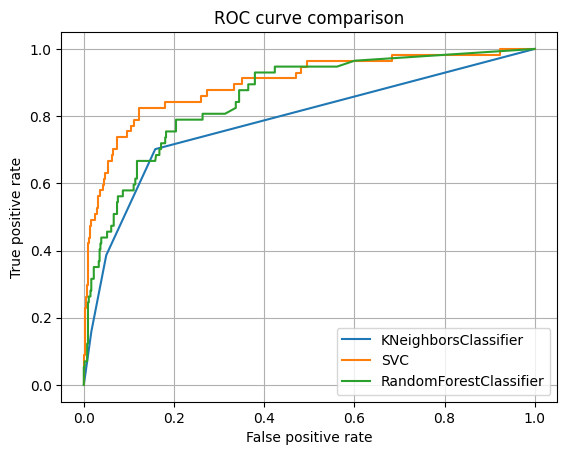

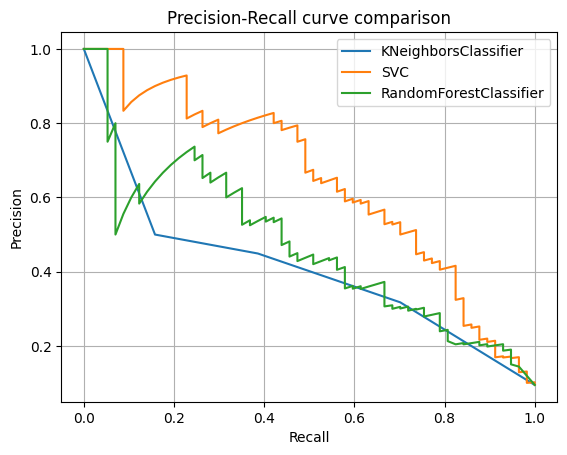

In [15]:
from sklearn.model_selection import train_test_split

# Assuming you have X and Y as your feature and target variables
Xtrain_cv, Xval_cv, Ytrain_cv, Yval_cv = train_test_split(
    Xtrain, Ytrain, test_size=0.2, random_state=42
)
knn = KNeighborsClassifier(**best_knn_params)
svm = SVC(**best_svm_params, probability=True)
rf = RandomForestClassifier(**best_rf_params)

fig, ax = plt.subplots()
for classifier in [knn, svm, rf]:
    classifier.fit(Xtrain_cv, Ytrain_cv)

for classifier in [knn, svm, rf]:
    z = classifier.predict_proba(Xval_cv)[:, 1]
    fpr, tpr, thresholds = roc_curve(Yval_cv, z)
    ax.plot(fpr, tpr, label=classifier.__class__.__name__)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve comparison")
ax.legend()
ax.grid(True)
plt.show()

fig, ax = plt.subplots()
for classifier in [knn, svm, rf]:
    z = classifier.predict_proba(Xval_cv)[:, 1]
    precision, recall, thresholds = precision_recall_curve(Yval_cv, z)
    ax.plot(recall, precision, label=classifier.__class__.__name__)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision-Recall curve comparison")
ax.legend()
ax.grid(True)
plt.show()

v. The AOC-ROC values for the SVM and Random Forest are quite similar, however the ROC curves are noticeably different. The Random forest seems to choose more positive values than SVM, leading to a higher True positive rate, but also leading to relatively more false positives on the left of the curve. The PR curve shows that the SVM clearly outperforms the other two classifiers. This is good since the PR curve is not affected by our imbalanced dataset.

## Question 4

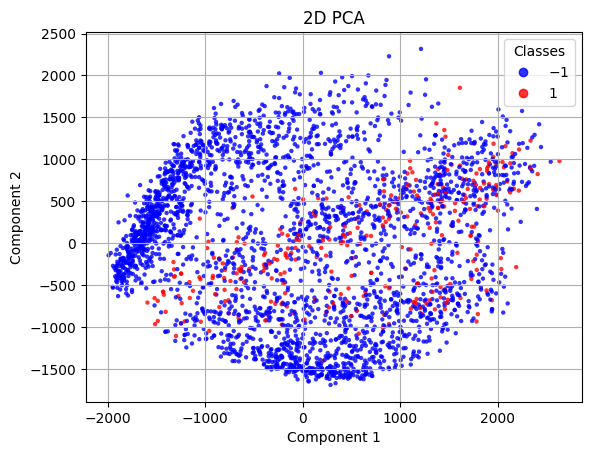

In [16]:
from sklearn.decomposition import PCA

num_components = 2

pca = PCA(n_components=num_components)
pca.fit(Xtrain)
projected = pca.transform(Xtrain)

fig, ax = plt.subplots()
scatter = ax.scatter(
    projected[:, 0],
    projected[:, 1],
    c=Ytrain,
    cmap="bwr",
    edgecolor="none",
    alpha=0.8,
    s=10,
)
ax.set_title("2D PCA")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.grid(True)
ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()

i. The dimensionality reduction has exposed a number of clusterings in the data. In fact, looking at the clusterings of the classes it is clear that some negative samples are very separate from the positive ones, but there are also some negative samples that are hard to distinguish from the positive.

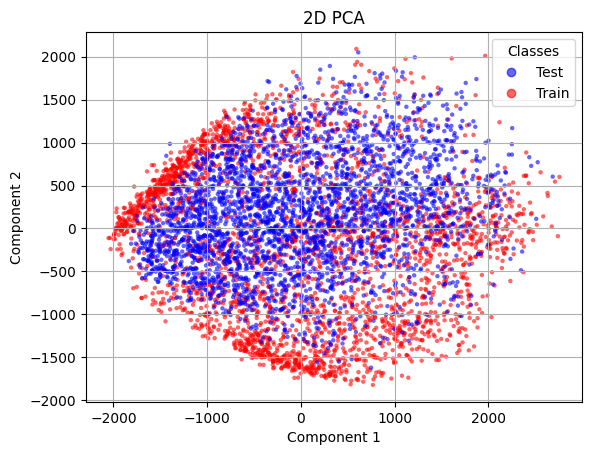

In [17]:
Xall = np.concatenate((Xtrain, Xtest))
# Y test has label -1, Y train has label 1
Ylabel_test_train = np.concatenate(
    (np.full(len(Ytrain), 1), np.full(len(Xtest), -1))
)

pca = PCA(n_components=num_components)
pca.fit(Xall)
projected = pca.transform(Xall)

fig, ax = plt.subplots()
scatter = ax.scatter(
    projected[:, 0],
    projected[:, 1],
    c=Ylabel_test_train,
    cmap="bwr",
    edgecolor="none",
    alpha=0.6,
    s=10,
)
ax.set_title("2D PCA")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.grid(True)
legend_map = {-1: "Test", 1: "Train"}
elts = (
    scatter.legend_elements(num=2)[0][0],
    scatter.legend_elements(num=2)[0][2],
)
ax.legend(handles=elts, labels=["Test", "Train"], title="Classes")

The data is not distributed in the same way in the test and train data. This can be inferred from the PCA plot since the test data doesn't overlap the clusters at the top and bottom. This is due to the fact that the samples in the test set are obscured with rotations and noise. This means the PCA is unlikely to work well on both sets in combination, at least not with 2 dimensions. 

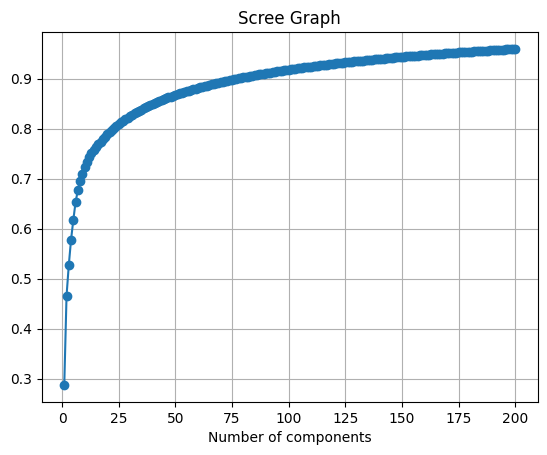

PCA with 168 components explains 95% of variance


In [18]:
pca = PCA(n_components=200)
pca.fit(Xtrain)

scree = [
    np.arange(len(pca.explained_variance_ratio_)) + 1,
    np.cumsum(pca.explained_variance_ratio_),
]
plt.figure()
plt.plot(*scree, "o-")
plt.grid()
plt.xlabel("Number of components")
plt.title("Scree Graph")
plt.show()

optimal_pca_components = np.where(scree[1] > 0.95)[0][0]
print(f"PCA with {optimal_pca_components} components explains 95% of variance")

We will use 168 components for the classification

Fitting 3 folds for each of 16 candidates, totalling 48 fits
SVM with PCA (168 components) - Best parameters
{'C': 80, 'kernel': 'rbf'}
SVM with PCA (168 components) - Validation set statistics
              metric      mean       std
0           Accuracy  0.928333  0.006498
1  Balanced accuracy  0.791010  0.035884
2            AUC ROC  0.921120  0.011200
3             AUC PR  0.696667  0.034355
4                 F1  0.639115  0.045744
5                MCC  0.601657  0.046700
6         Time Taken  0.572533  0.018710


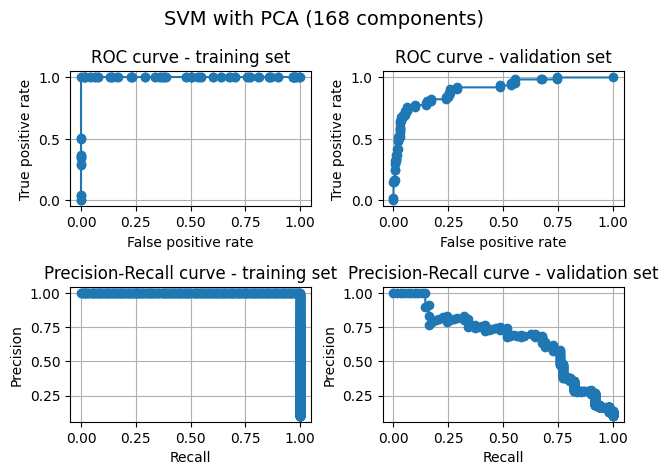

In [19]:
pca = PCA(n_components=optimal_pca_components)
pca.fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)

svm_grid = {"C": [5, 10, 20, 50, 80, 100, 200, 500], "kernel": ["rbf", "poly"]}
svm = SVC(random_state=42)
svm_grid_search_pca = perform_grid_search(
    Xtrain_pca,
    Ytrain,
    svm,
    svm_grid,
    f"SVM with PCA ({optimal_pca_components} components)",
)
svm_grid_search_pca["probability"] = True

svm_pca_stats = perform_cross_validation(
    Xtrain_pca,
    Ytrain,
    SVC,
    svm_grid_search_pca,
    f"SVM with PCA ({optimal_pca_components} components)",
)

This actually yields the best result, improving on the SVM on its own with an F1 score of 0.642840 compared to 0.637932.

## Question 5

We will use the SVM with PCA approach developed in question 4.

In [20]:
def train_classifier(
    Xtrain,
    Ytrain,
    classifier_cls=SVC,
    classifier_kwargs=svm_grid_search_pca,
    pca_components=optimal_pca_components,
):
    pca = PCA(n_components=pca_components)
    pca.fit(Xtrain)
    Xtrain_pca = pca.transform(Xtrain)

    classifier_kwargs.pop("probability", None)
    classifier = classifier_cls(**classifier_kwargs)
    classifier.fit(Xtrain_pca, Ytrain)
    return classifier, pca


def predict_test_set(Xtest, classifier, pca):
    Xtest_pca = pca.transform(Xtest)
    Ytest_pred = classifier.predict(Xtest_pca)
    return Ytest_pred

In [21]:
clf, pca = train_classifier(Xtrain, Ytrain)

Ytest_pred = predict_test_set(Xtest, clf, pca)

np.savetxt("u2012702.csv", Ytest_pred, fmt="%d")

## Question 6

In [22]:
Xall = np.concatenate((Xtrain, Xtest))
Yall = np.concatenate((np.full(len(Ytrain), -1), np.full(len(Xtest), 1)))

def plot_identify_test_set(Xall, Yall, rfparams=best_rf_params, splits=5):
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)
    folds = list(skf.split(Xall, Yall))
    auc_roc = []
    for i, (train_index, val_index) in enumerate(folds):
        Xtrain_split = Xall[train_index]
        Xval_split = Xall[val_index]
        Ytrain_split = Yall[train_index]
        Yval_split = Yall[val_index]
        classifier = RandomForestClassifier(**best_rf_params, random_state=42)
        classifier.fit(Xtrain_split, Ytrain_split)

        z = classifier.predict_proba(Xval_split)[:, 1]
        Yval_pred = classifier.predict(Xval_split)

        auc_roc.append(roc_auc_score(Yval_split, z))
        
        if i == 0:
            fpr, tpr, thresholds = roc_curve(Yval_split, z)

            plt.plot(fpr, tpr, "o-")
            plt.xlabel("False positive rate")
            plt.ylabel("True positive rate")
            plt.title(f"ROC curve - identifying test set with {classifier.__class__.__name__} (AUC-ROC: {auc_roc[-1]:.4f})")
            plt.grid(True)
            plt.show()
            
    mean_auc_roc = np.mean(auc_roc)
    std_auc_roc = np.std(auc_roc)

    print(f"Mean AUC ROC: {mean_auc_roc}, Std AUC ROC: {std_auc_roc}")

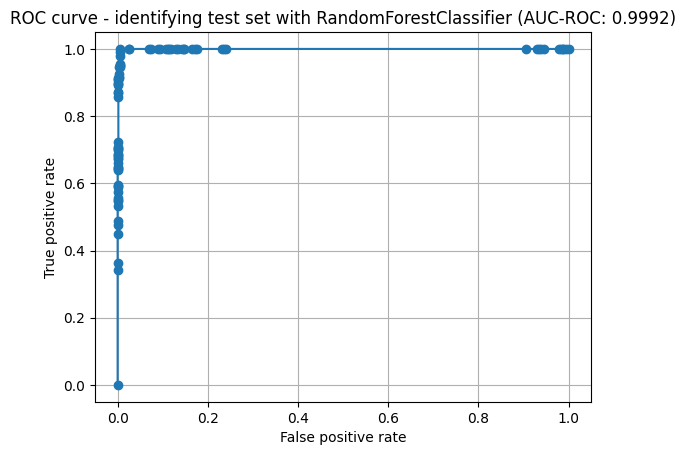

Mean AUC ROC: 0.9995149999999999, Std AUC ROC: 0.0004679103797275506


In [23]:
plot_identify_test_set(Xall, Yall)

i. This extremely high score suggests that the samples in the training and test sets have very obvious differences. This difference may mean any models trained on the training data won't generalise well to the test data, even when it does well on cross validation.

ii. We would expect an AUC-ROC score of 0.5 for this experiment if the training data and test data were indistinguishable. That is to say, there is no difference in the distribution of the data across the two sets. This metric can be used to help improve our training data such that it resembles the test data as closely as possible, since the test data is likely to be the real world data. This would allow our models to generalise much better to real world data, and bring the cross validation results in line with test accuracy. As it stands, any model trained on this data is unlikely to generalise well at all to the test data.

The first step to improving the training data is to qualitatively inspect the differences in the training and test data and try to artificially modify the training data to match. In our case, this would include rotating the images by multiples of 90 degrees and adding noise (as seen in question 1). While this would cause performance in cross validation to decrease, it would likely greatly improve the model's generalisation to the test data. After modifying the training set we could run this process again and check that the AUC-ROC score has decreased. Of course, the easiest way to improve our training data is to get new data with the same method that the test data was produced.